In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
#import geopandas as gpd
warnings.filterwarnings('ignore')
% pylab inline

UsageError: Line magic function `%` not found.


In [36]:
my_data=pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results.csv")

In [37]:
my_data.shape

(385124, 18)

In [38]:
for i in my_data.columns:
    print(i, 'has type:',my_data[i].dtype,'and null values equal to:',my_data[i].isnull().sum())

CAMIS has type: int64 and null values equal to: 0
DBA has type: object and null values equal to: 390
BORO has type: object and null values equal to: 0
BUILDING has type: object and null values equal to: 240
STREET has type: object and null values equal to: 4
ZIPCODE has type: float64 and null values equal to: 5921
PHONE has type: object and null values equal to: 3
CUISINE DESCRIPTION has type: object and null values equal to: 0
INSPECTION DATE has type: object and null values equal to: 0
ACTION has type: object and null values equal to: 1110
VIOLATION CODE has type: object and null values equal to: 5848
VIOLATION DESCRIPTION has type: object and null values equal to: 7868
CRITICAL FLAG has type: object and null values equal to: 0
SCORE has type: float64 and null values equal to: 19054
GRADE has type: object and null values equal to: 190538
GRADE DATE has type: object and null values equal to: 192114
RECORD DATE has type: object and null values equal to: 0
INSPECTION TYPE has type: obje

In [11]:
my_data = my_data.dropna(subset=['ACTION','INSPECTION TYPE'], how='all')
my_data = my_data.reset_index(drop=True)
my_data.shape

(384014, 19)

In [39]:
code_map = {
    '02':'FOOD TEMPERATURE',
    '03':'FOOD SOURCE',
    '04':'PERSONAL HYGIENE/FOOD PROTECTION',
    '05':'FACILITY DESIGN',
    '06':'PERSONAL HYGIENE/FOOD PROTECTION',
    '08':'VERMIN/GARBAGE',
    '09':'FACILITY MAINTENANCE',
    '10':'FACILITY DESIGN',
    '07':'OTHER',
    '20':'LETTER GRADE CARD/OTHER POSTER ABSENT',
    '16':'MENU DESCRIPTION IMPROPER',
    '22':'OTHER',
    '15':'NO SMOKING POLICY',
    '18':'OTHER',
    'na':'NONE' 
}

In [40]:
# Function that maps the P and Z grade to correct A, B or C grade
def grades_change(y):
    grade_list = ['A','B','C']
    if (y['GRADE'] in grade_list):
        return y['GRADE']
    elif (y['GRADE']=='P')| (y['GRADE']=='Z'):
        if (y['SCORE']>=0) & (y['SCORE']<=13):
            return 'A'
        elif (y['SCORE']>=14) & (y['SCORE']<=27):
            return 'B'
        else:
            return 'C'

In [41]:
my_data['GRADE'] = my_data.apply(grades_change,axis=1)
# After converting the grades to their correct class let's just check the final counts of them
my_data['GRADE'].value_counts()

A    156763
B     26987
C      9253
Name: GRADE, dtype: int64

In [15]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384014 entries, 0 to 384013
Data columns (total 19 columns):
CAMIS                    384014 non-null int64
DBA                      384014 non-null object
BORO                     384014 non-null object
BUILDING                 383780 non-null object
STREET                   384014 non-null object
ZIPCODE                  378106 non-null float64
PHONE                    384014 non-null object
CUISINE DESCRIPTION      384014 non-null object
INSPECTION DATE          384014 non-null object
ACTION                   384014 non-null object
VIOLATION CODE           379276 non-null object
VIOLATION DESCRIPTION    377256 non-null object
CRITICAL FLAG            384014 non-null object
SCORE                    366070 non-null float64
GRADE                    193003 non-null object
GRADE DATE               193010 non-null object
RECORD DATE              384014 non-null object
INSPECTION TYPE          384014 non-null object
VIOLATION_TYPE          

In [17]:
#my_data['ZIPCODE'] = my_data['ZIPCODE'].astype(int).astype(str)

In [20]:
my_data['CAMIS'].nunique()
#import matplotlib as plt

Text(0, 0.5, 'Number of Restaurants')

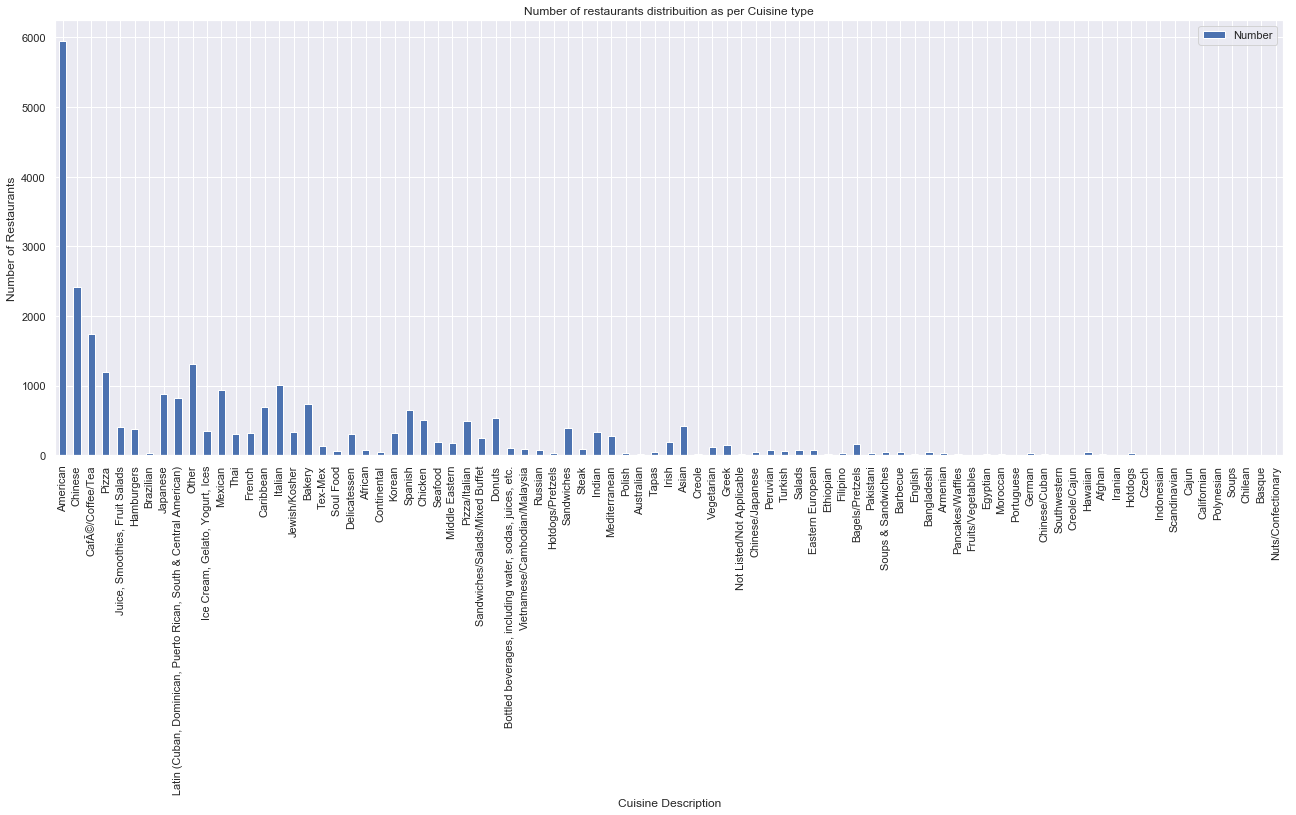

In [42]:
cus = []
cus_n = []
for i in my_data["CUISINE DESCRIPTION"].unique():
    cus.append(i)
    cus_n.append(my_data[my_data["CUISINE DESCRIPTION"]==i]["CAMIS"].nunique())
my_data_cus = { 'Cuisine Description':cus,'Number':cus_n}
my_data_cus = pd.DataFrame(my_data_cus)
my_data_cus.plot(x="Cuisine Description", y=["Number"], kind="bar",figsize=(22,8))
plt.title('Number of restaurants distribuition as per Cuisine type')
plt.ylabel('Number of Restaurants')

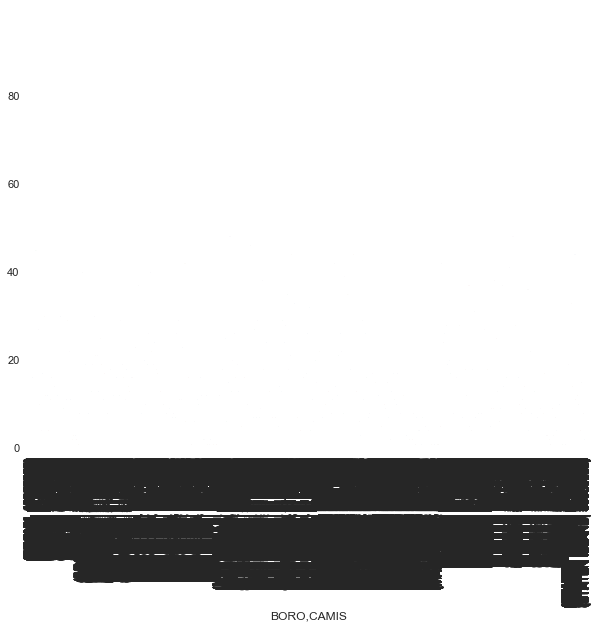

In [45]:
my_data.groupby(['BORO','CAMIS']).BORO.count().plot(kind='bar')

In [24]:

#bor = []
#bor_n = []
#for i in my_data["BORO"].unique():
   # bor.append(i)
    #bor_n.append(my_data[my_data["BORO"]==i]["CAMIS"].nunique())
#my_data_bor = { 'Borough':bor,'Number':bor_n}
#my_data_bor = pd.DataFrame(my_data_bor)
#my_data_bor = my_data_bor.sort_values(['Number'],ascending=[0])
#my_data_bor.reset_index(drop=True,inplace=True)
#my_data_bor.plot(x=["Borough"], y=["Number"], kind="bar",figsize=(6,4))
#plt.ylabel('Number of Restaurants')
#plt.show()


ValueError: x must be a label or position

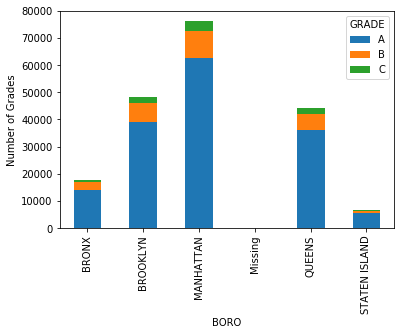

In [25]:
my_data2 = my_data.groupby(['BORO', 'GRADE'])['BORO'].count().unstack('GRADE').fillna(0)
my_data2[['A','B','C']].plot(kind='bar', stacked=True)
plt.ylabel('Number of Grades')
plt.show()

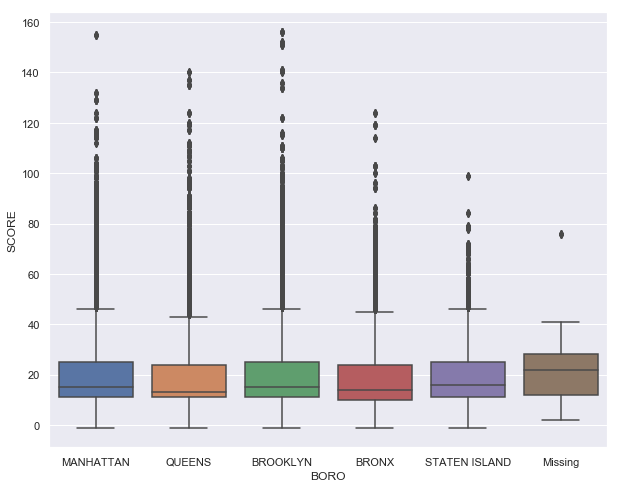

In [26]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='BORO',y='SCORE',data=my_data)

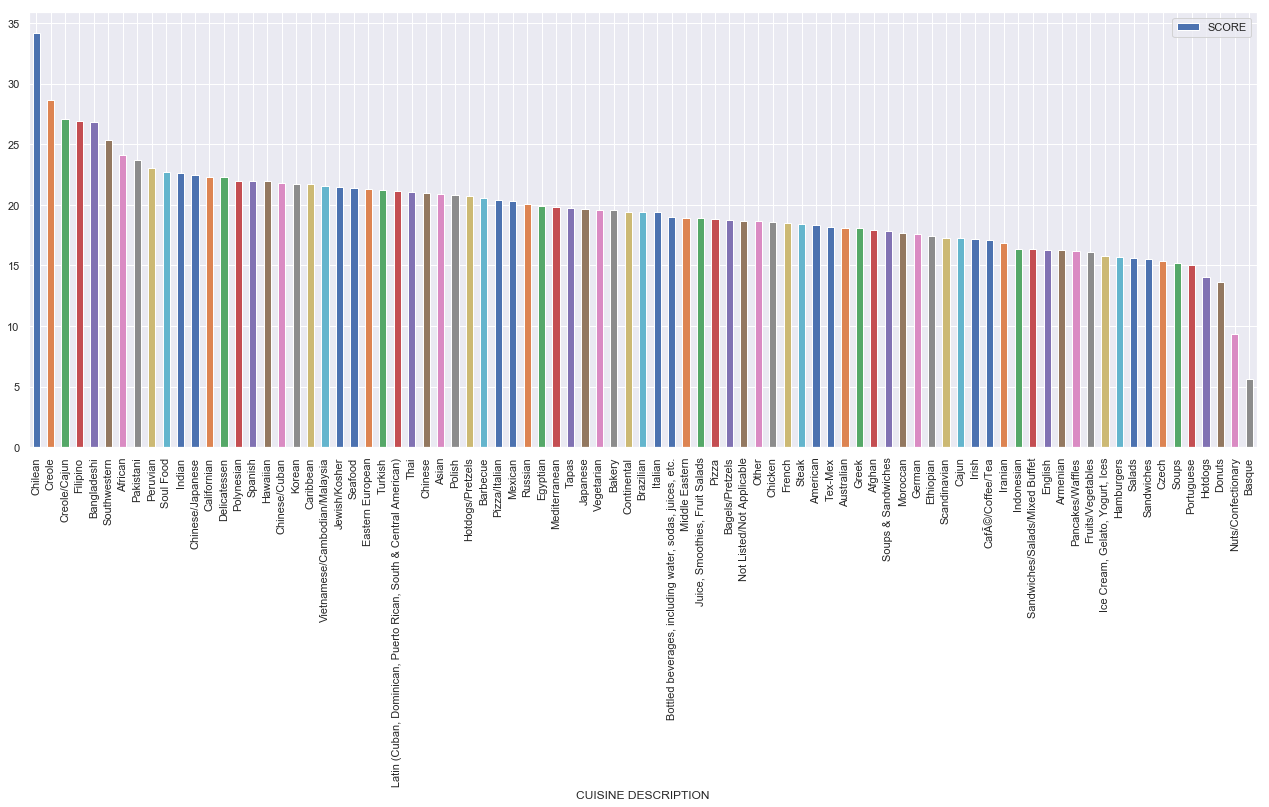

In [27]:
#Now let us check the distribution of Average Scores across Cuisine Types
my_data_c = my_data.groupby(['CUISINE DESCRIPTION'],as_index=False)['SCORE'].mean()
my_data_c.sort_values(by='SCORE', ascending=False, inplace=True)
my_data_c.reset_index(drop=True,inplace=True)
my_data_c.plot.bar(x='CUISINE DESCRIPTION', y='SCORE',figsize=(22,8))

In [34]:
#Now let us check the distribution of Violation Types
my_data_v = my_data.groupby(['VIOLATION TYPE'],as_index=False)['CAMIS'].count()
my_data_v.rename(columns={'CAMIS': 'Count'}, inplace=True)
my_data_v.sort_values(by='Count', ascending=False, inplace=True)
my_data_v.reset_index(drop=True,inplace=True)
my_data_v.plot.bar(x='VIOLATION TYPE', y='Count')
plt.ylabel('Number of Violations')
plt.show()

KeyError: 'VIOLATION TYPE'

In [30]:
my_data_closed = my_data[my_data['ACTION'].str.contains("Establishment Closed|Establishment re-closed")]
print ('Total Number of times Restaurants closed by the Health Inspectors are',my_data_closed['ACTION'].count())

Total Number of times Restaurants closed by the Health Inspectors are 14461


In [33]:
my_data_cr = my_data_closed.groupby(['VIOLATION TYPE'],as_index=False)['CAMIS'].count()
my_data_cr.rename(columns={'CAMIS': 'Count'}, inplace=True)
my_data_cr.sort_values(by='Count', ascending=False, inplace=True)
my_data_cr.reset_index(drop=True,inplace=True)
my_data_cr.plot.bar(x='VIOLATION TYPE', y='Count')
plt.ylabel('Number of Closings')
plt.show()

KeyError: 'VIOLATION TYPE'

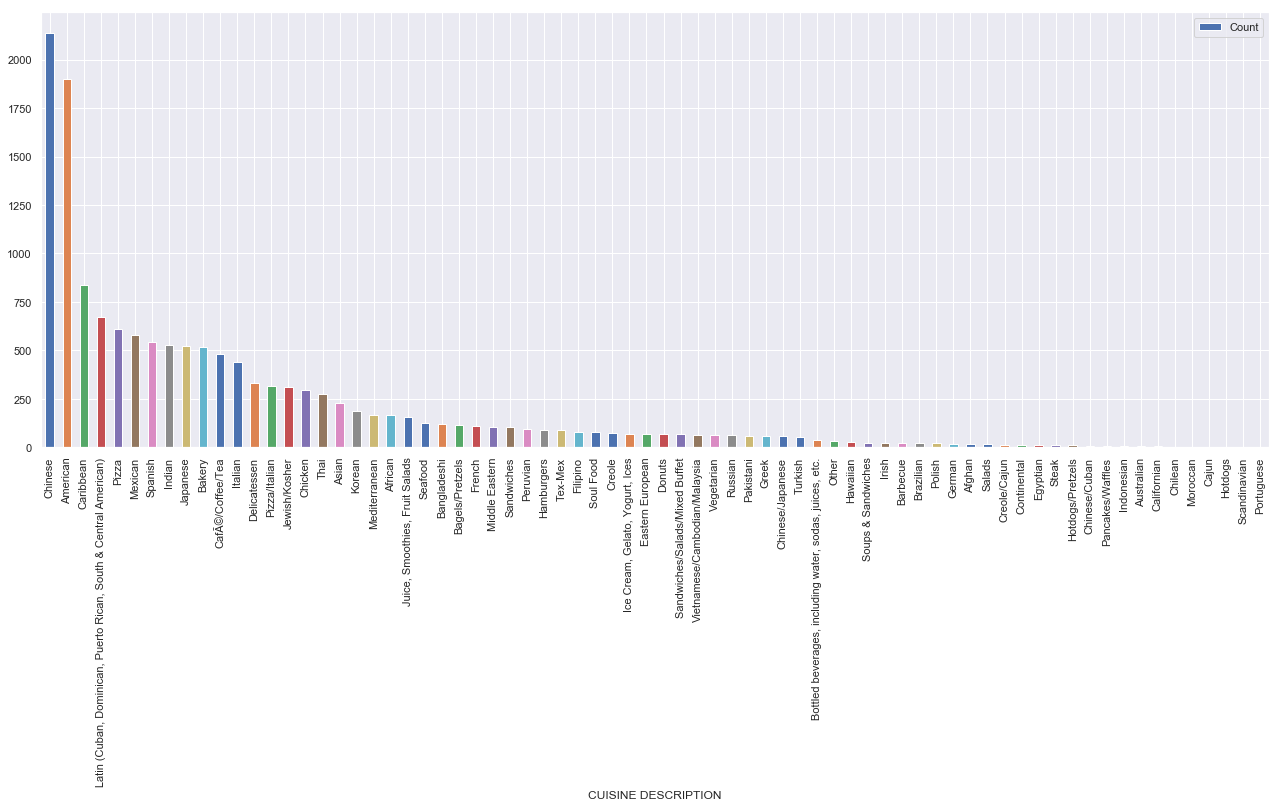

In [32]:
my_data_cct = my_data_closed.groupby(['CUISINE DESCRIPTION'],as_index=False)['CAMIS'].count()
my_data_cct.rename(columns={'CAMIS': 'Count'}, inplace=True)
my_data_cct.sort_values(by='Count', ascending=False, inplace=True)
my_data_cct.reset_index(drop=True,inplace=True)
my_data_cct.plot.bar(x='CUISINE DESCRIPTION', y='Count',figsize=(22,8))